# Imports

### Libraries

In [171]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [172]:
import importlib

importlib.reload(tools.metrics)

<module 'tools.metrics' from '/home/neillucha/ml-algorithms-from-scratch/tools/metrics.py'>

In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from algorithms.logistic_regression import LogisticRegression
from tools.preprocessing import train_test_split, standardize
from tools.metrics import accuracy_score, binary_confusion_matrix

### Dataset

In [174]:
data = pd.read_csv('../data/breast_cancer_wisconsin.csv')
data.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
243,88411702,B,13.750,23.77,88.54,590.0,0.08043,0.06807,0.046970,0.023440,...,26.34,98.00,706.0,0.09368,0.14420,0.13590,0.06106,0.2663,0.06321,NaN
101,862722,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.000000,0.000000,...,19.54,50.41,185.2,0.15840,0.12020,0.00000,0.00000,0.2932,0.09382,NaN
230,881972,M,17.050,19.08,113.40,895.0,0.11410,0.15720,0.191000,0.109000,...,24.89,133.50,1189.0,0.17030,0.39340,0.50180,0.25430,0.3109,0.09061,NaN
269,8910720,B,10.710,20.39,69.50,344.9,0.10820,0.12890,0.084480,0.028670,...,25.21,76.51,410.4,0.13350,0.25500,0.25340,0.08600,0.2605,0.08701,NaN
522,91789,B,11.260,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,...,26.43,76.38,435.9,0.11080,0.07723,0.02533,0.02832,0.2557,0.07613,NaN


# Preprocessing

### Dropping unnecessary columns and Label Encoding

In [175]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [176]:
diagnosis_map = {
    'M': 1,
    'B': 0,
}

columns_to_drop = [
    'id',
    'Unnamed: 32'
]

data['diagnosis'] = data['diagnosis'].map(diagnosis_map)
data = data.drop(columns=columns_to_drop)

In [177]:
data.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
482,0,13.47,14.06,87.32,546.3,0.10710,0.11550,0.05786,0.05266,0.1779,...,14.83,18.32,94.94,660.2,0.1393,0.24990,0.1848,0.1335,0.3227,0.09326
65,1,14.78,23.94,97.40,668.3,0.11720,0.14790,0.12670,0.09029,0.1953,...,17.31,33.39,114.60,925.1,0.1648,0.34160,0.3024,0.1614,0.3321,0.08911
550,0,10.86,21.48,68.51,360.5,0.07431,0.04227,0.00000,0.00000,0.1661,...,11.66,24.77,74.08,412.3,0.1001,0.07348,0.0000,0.0000,0.2458,0.06592
481,0,13.90,19.24,88.73,602.9,0.07991,0.05326,0.02995,0.02070,0.1579,...,16.41,26.42,104.40,830.5,0.1064,0.14150,0.1673,0.0815,0.2356,0.07603
23,1,21.16,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.08632,0.1769,...,29.17,35.59,188.00,2615.0,0.1401,0.26000,0.3155,0.2009,0.2822,0.07526


In [178]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Train-Test Split

In [179]:
X = data.iloc[:,1:].values
y = data.iloc[:, 0].values

X = standardize(X)


X_train, X_test, y_train, y_test = train_test_split(X, y)

In [180]:
print(X_test)

print(y_test)

[[-0.19028124 -0.17512557  0.25540933 ... -0.27049284 -0.26973505
  -0.27076353]
 [-0.1895804  -0.18239678  0.26373181 ... -0.27044421 -0.27007145
  -0.27077181]
 [-0.22076778 -0.20718901  0.05299792 ... -0.27077138 -0.26980864
  -0.27069476]
 ...
 [-0.20850308 -0.19742105  0.12443982 ... -0.27095088 -0.27002021
  -0.2708288 ]
 [-0.20986096 -0.18515634  0.12803162 ... -0.2702966  -0.26970439
  -0.27063476]
 [-0.21774541 -0.18121412  0.06714613 ... -0.27077138 -0.26991683
  -0.2707956 ]]
[1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0
 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0
 0 1 0]


# Creating and Training the Logistic Regressor

In [181]:
model = LogisticRegression()

model.train(x = X_train, y = y_train, learning_rate=0.01, epochs=100, track_loss=True)

Epoch 1, 	 Loss: 0.6931471805599453
Epoch 2, 	 Loss: 0.6907566843319656
Epoch 3, 	 Loss: 0.6885373191213187
Epoch 4, 	 Loss: 0.6864656060676129
Epoch 5, 	 Loss: 0.6845213193428948
Epoch 6, 	 Loss: 0.6826870604466704
Epoch 7, 	 Loss: 0.6809478791857865
Epoch 8, 	 Loss: 0.6792909392657653
Epoch 9, 	 Loss: 0.677705225355399
Epoch 10, 	 Loss: 0.6761812879395226
Epoch 11, 	 Loss: 0.6747110220860447
Epoch 12, 	 Loss: 0.6732874763007503
Epoch 13, 	 Loss: 0.6719046878374605
Epoch 14, 	 Loss: 0.6705575411081042
Epoch 15, 	 Loss: 0.6692416461532318
Epoch 16, 	 Loss: 0.6679532344593851
Epoch 17, 	 Loss: 0.666689069727128
Epoch 18, 	 Loss: 0.6654463714915025
Epoch 19, 	 Loss: 0.6642227497694888
Epoch 20, 	 Loss: 0.6630161491543599
Epoch 21, 	 Loss: 0.6618248009944936
Epoch 22, 	 Loss: 0.6606471824854178
Epoch 23, 	 Loss: 0.659481981670583
Epoch 24, 	 Loss: 0.6583280674908166
Epoch 25, 	 Loss: 0.6571844641470691
Epoch 26, 	 Loss: 0.6560503291482196
Epoch 27, 	 Loss: 0.6549249345075916
Epoch 28, 	 L

(array([0.03977258, 0.03466618, 0.01060474, 0.00968782, 0.04544459,
        0.04548795, 0.04554164, 0.04552477, 0.04539034, 0.04545912,
        0.04548658, 0.04458261, 0.04538124, 0.05898497, 0.04549969,
        0.04549611, 0.04549484, 0.04550122, 0.04548975, 0.04550285,
        0.040372  , 0.03183223, 0.01461609, 0.14834562, 0.04542666,
        0.045492  , 0.04555809, 0.04551762, 0.04534213, 0.04545474]),
 np.float64(-0.16785589947139803))

# Results

### Accuracy Score

In [182]:
print(f'Accuracy Score : {accuracy_score(y_test, model.predict(X_test))}')

Accuracy Score : 0.9035087719298246


### Confusion Matrix

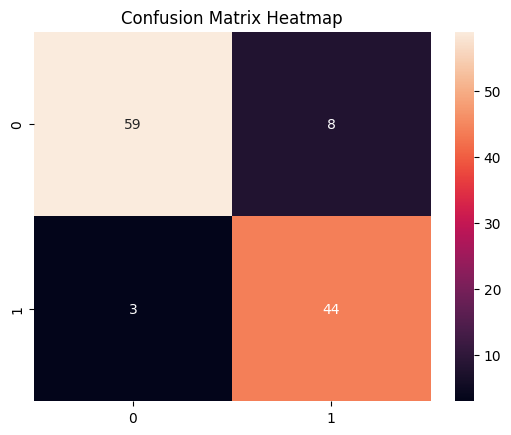

In [183]:
sns.heatmap(binary_confusion_matrix(y_true=y_test, y_pred=model.predict(X_test)), annot=True)
plt.title('Confusion Matrix Heatmap')
plt.show()

### Loss vs Epoch

[]

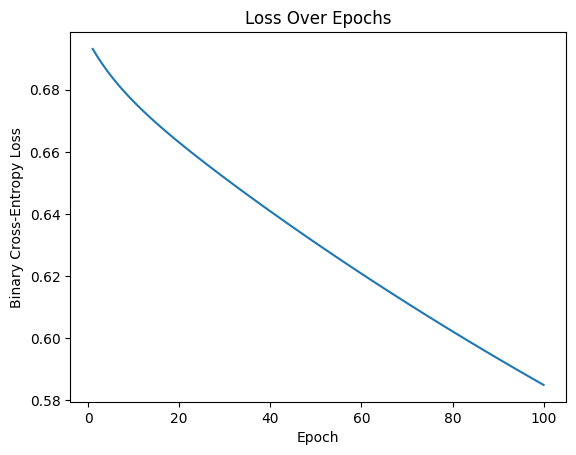

In [185]:
losses = list(model.loss_history.values())
plt.plot(range(1, len(losses)+1), losses)
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Loss Over Epochs")
plt.plot()